
# Bike Rental Demand Study

#### Problem Statement:
Undersytanding and modelling the demand for shared bikes with the available independent variables in the available dataset. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
rental = pd.read_csv("day.csv")
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
rental.shape

(730, 16)

In [5]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Based on the summary of the rental dataset , we see there are 730 records and 16 variables with no missing values.
# holiday is a binary variable where '0' represnts a working day while '1' represnts a holiday.
# 'season' , 'weathersit' etc variables are coded , to be decoded with meaningful labels. 
# Asper the buisness statement, its clear that our target variable is 'cnt' as it is directly related to prediction of demand problem 

In [7]:
rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# from the summary it seems there are no outliers in the dataset, for all the variables mean and median is also almost same.


In [9]:
# checking for unique values
for var in rental.columns:
    print(var , rental[var].unique())

instant [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 24

# Visualising the Data

In [10]:
# lets first create list of relevant numerical and categorical variables to visualise the relation with 'cnt' (TARGET VARIABLE)

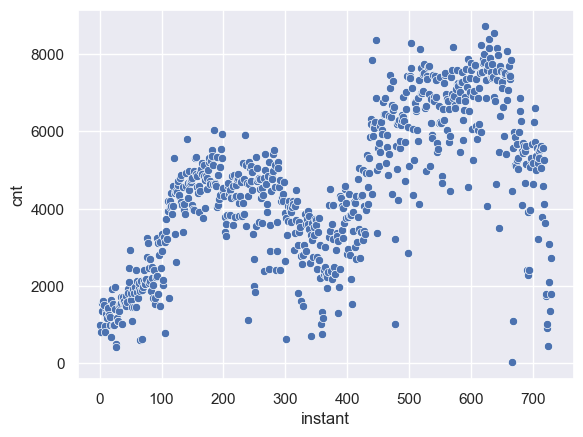

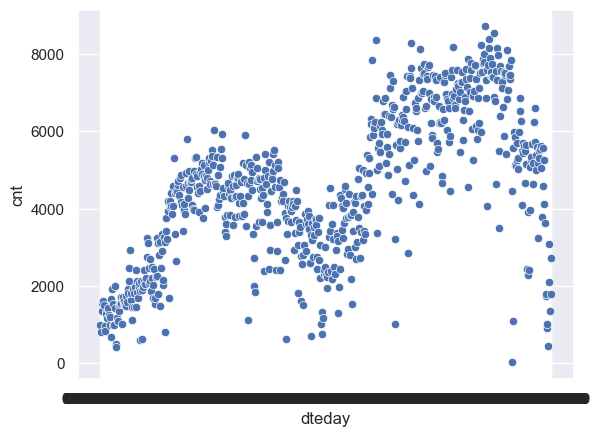

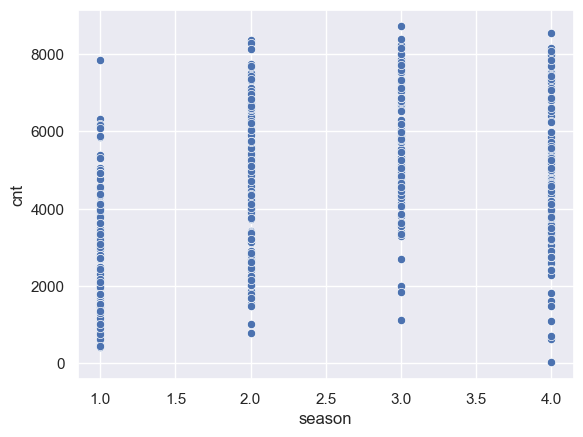

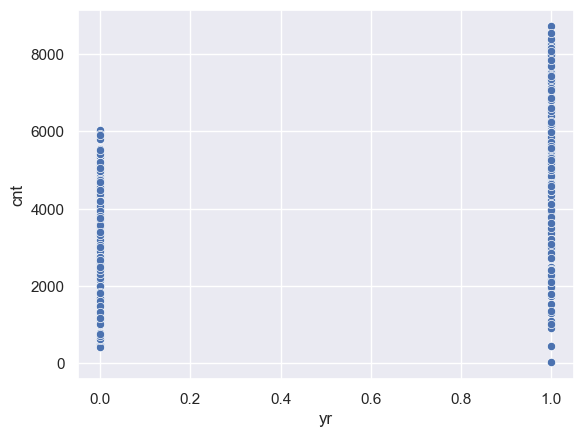

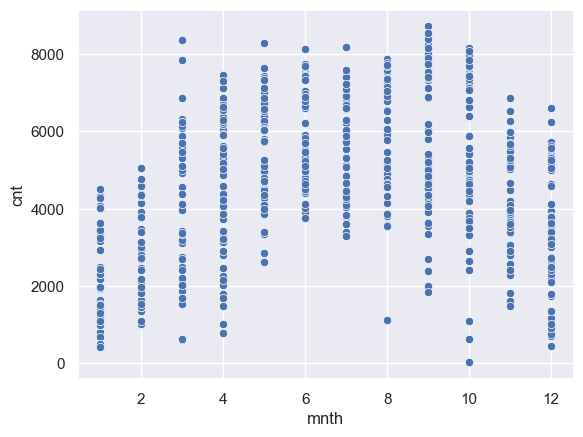

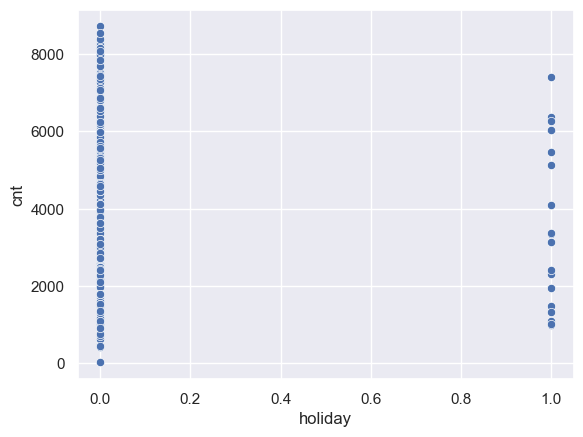

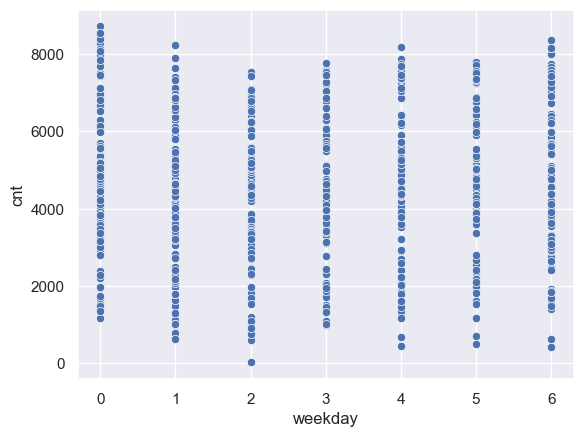

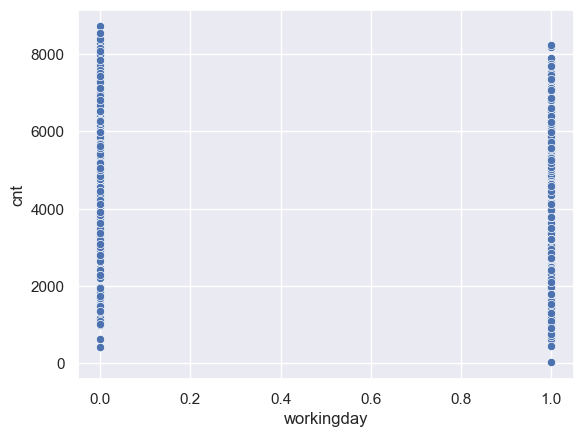

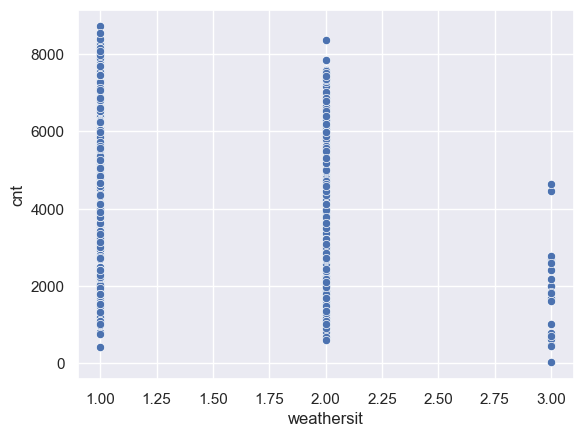

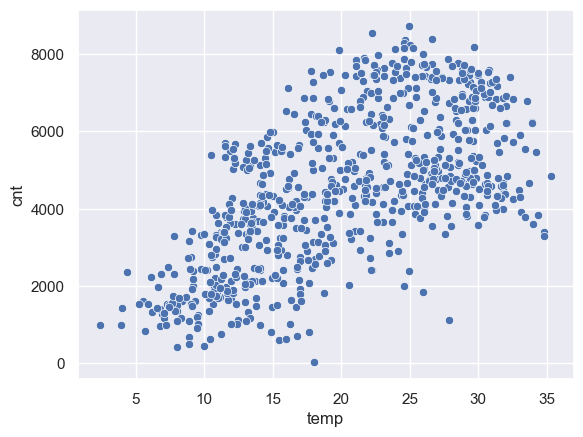

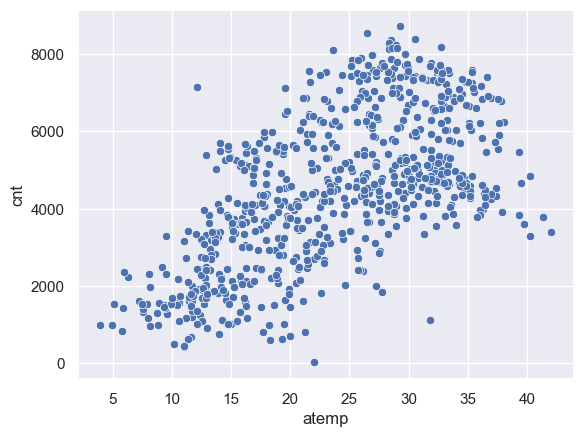

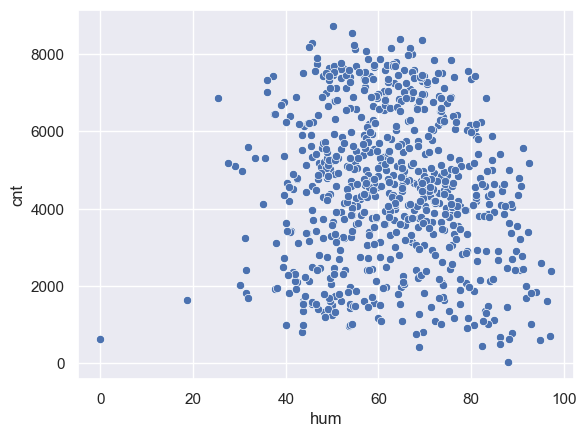

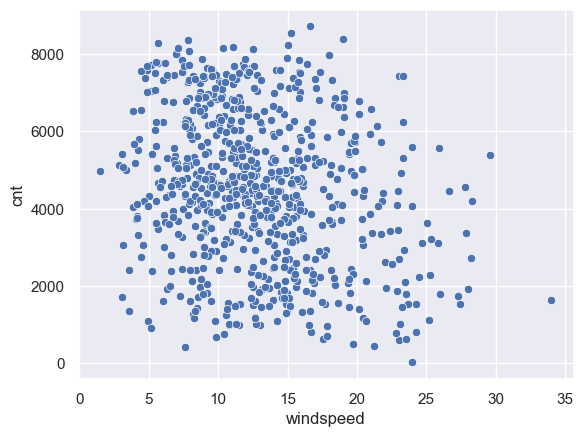

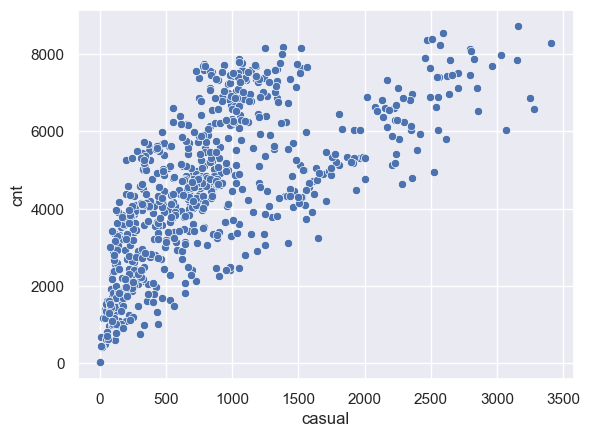

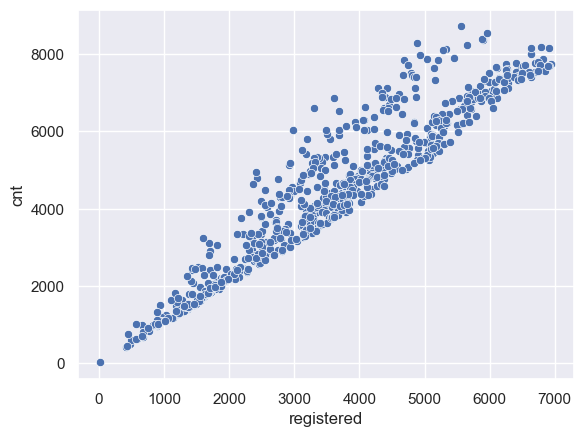

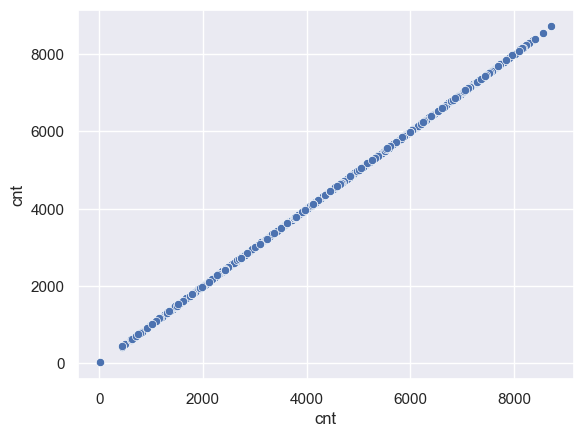

In [11]:
for var in rental.columns:
    sns.scatterplot(x = rental[var] , y = rental['cnt'])
    plt.show()

In [12]:
# interestingly, 'cnt' variable seems to have a strong positive relationship with 'temp'
# holidays have less demand, so maybe people using the service seem to stay at home at weekends or use other modes of transport. 
# with hum and windspeed it does not seems strong relation.
# obviously clear weather increases the demand. 


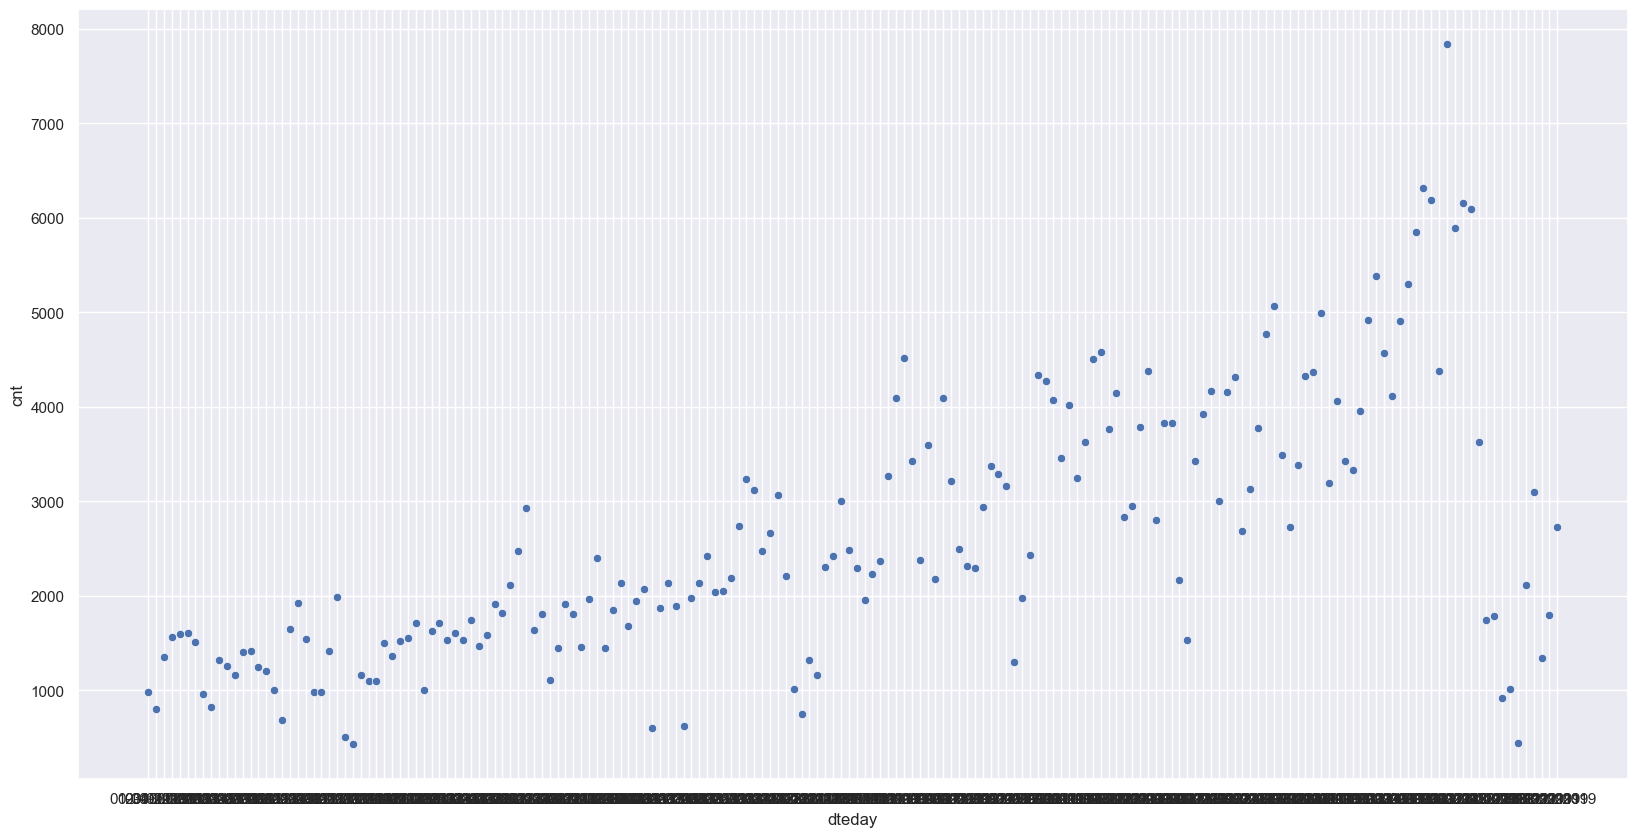

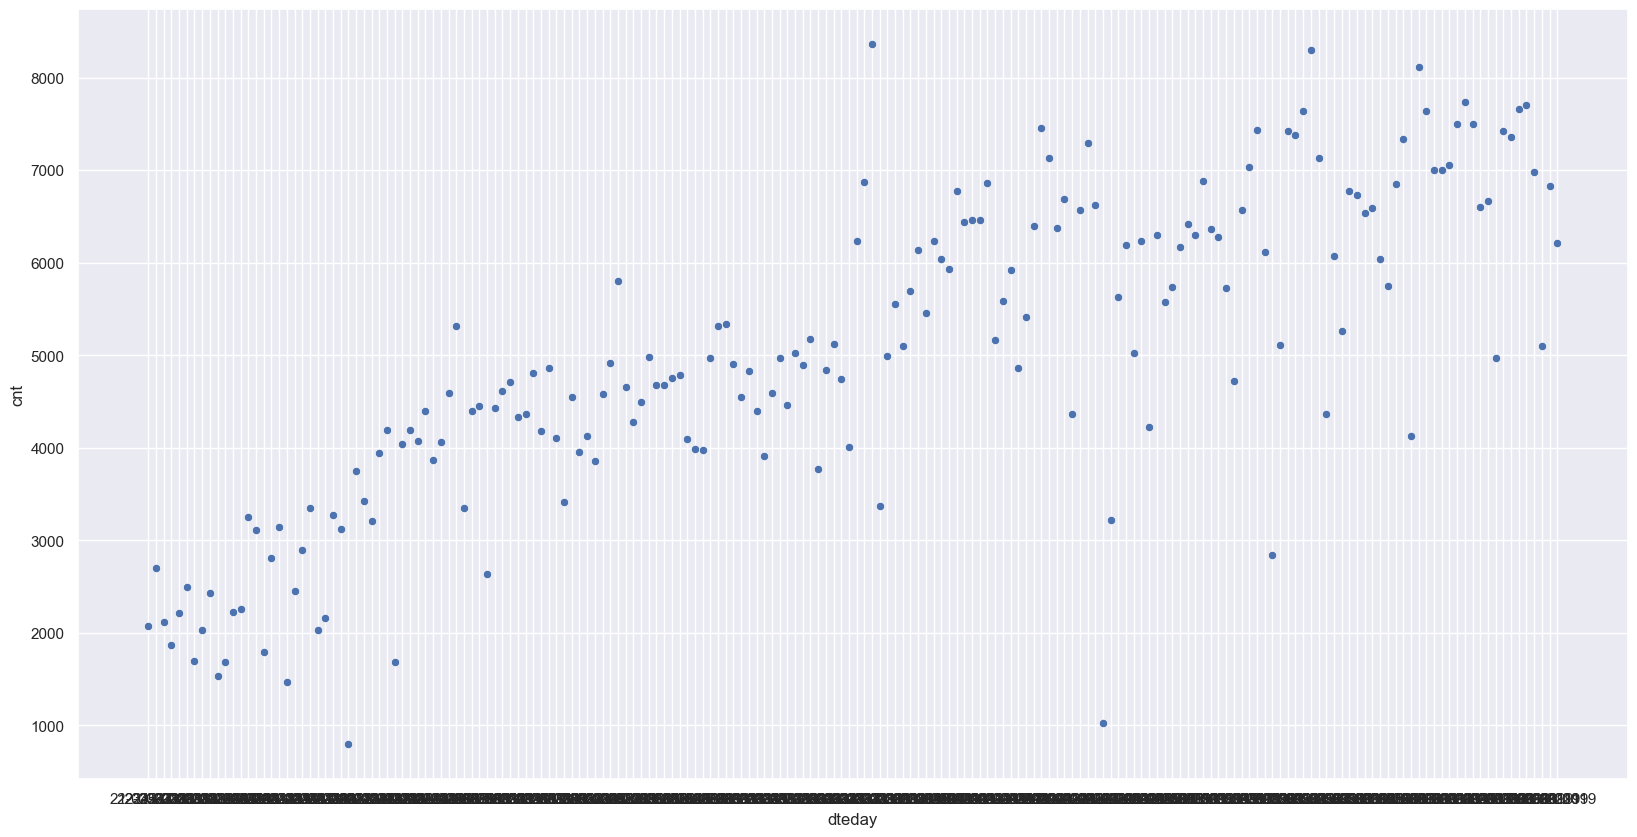

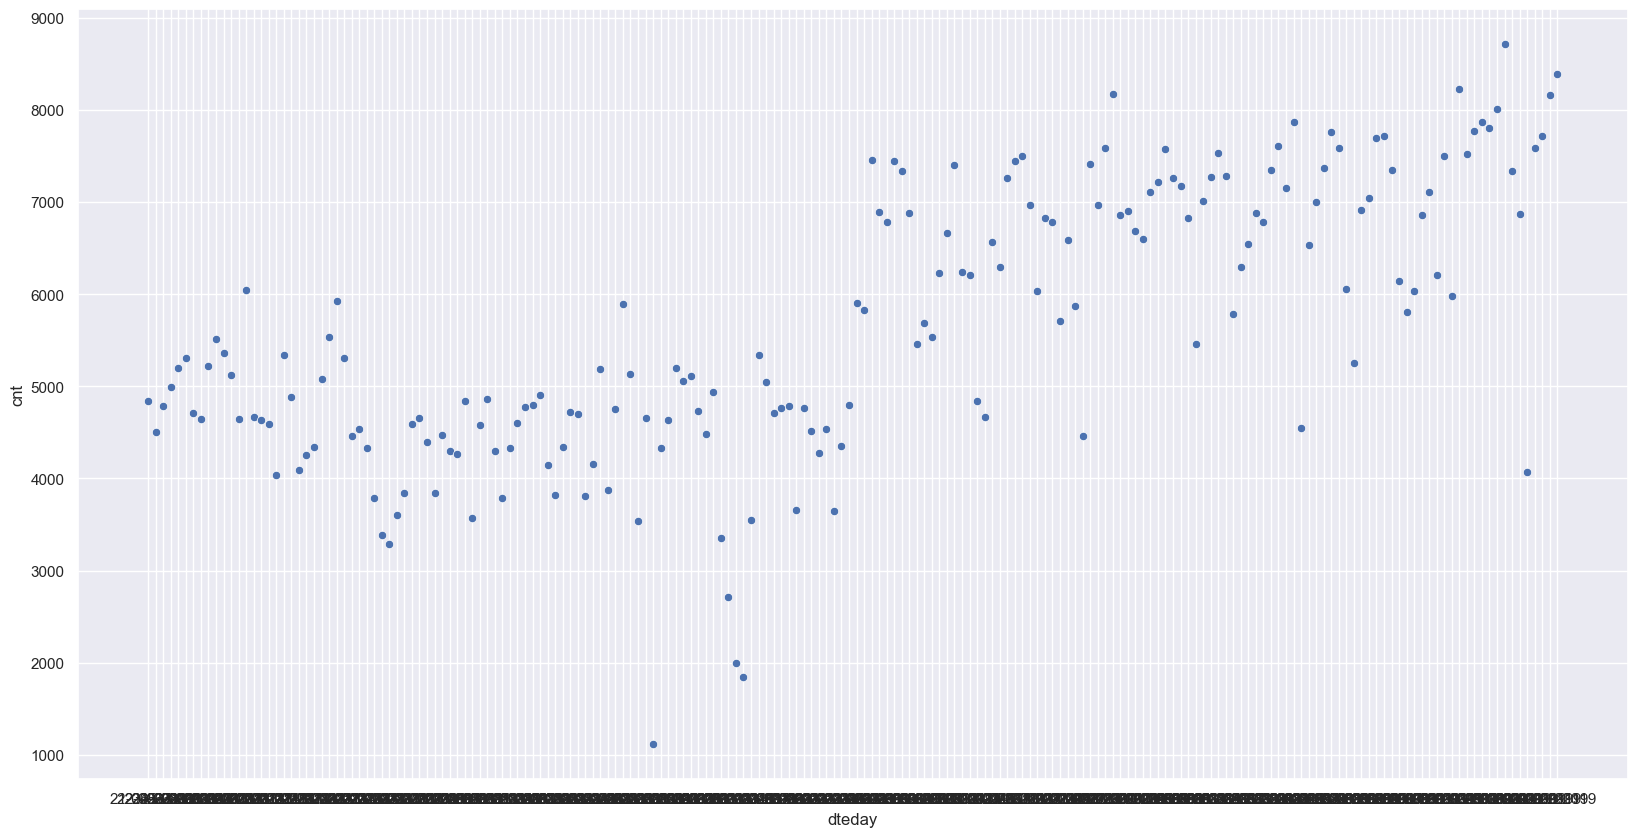

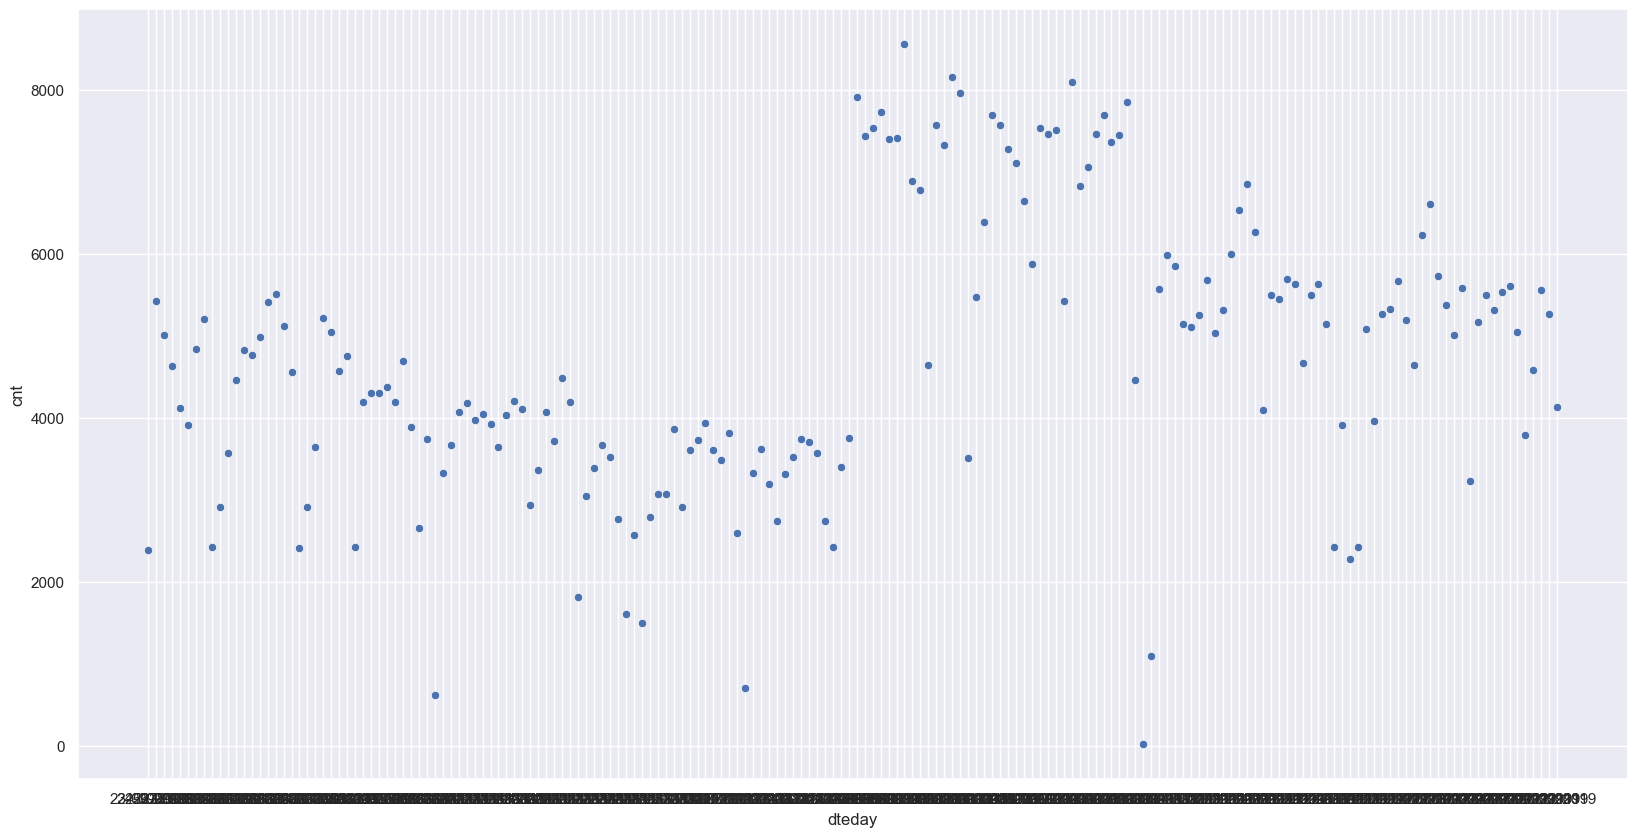

In [13]:
#seasonal trend
for i in range(1,5):
    plt.figure(figsize=(20,10))
    sns.scatterplot(x = rental[rental['season'] == i]['dteday'] , y = rental['cnt'])
    plt.show()

In [14]:
#  from the plots, it seems there is some relationship with seasons, but need to check the correlation coeeficient for better understanding

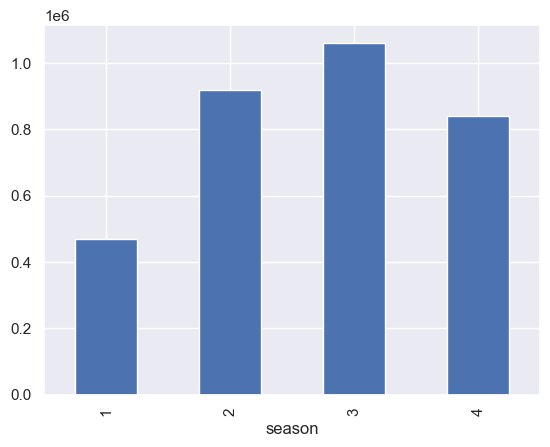

In [15]:
# checking total counts in different seosons 
rental.groupby('season')['cnt'].sum().plot.bar()
plt.show()

In [16]:
# the season 3 (fall) seems to have highest demand, while season 1 (spring) has the lowest.

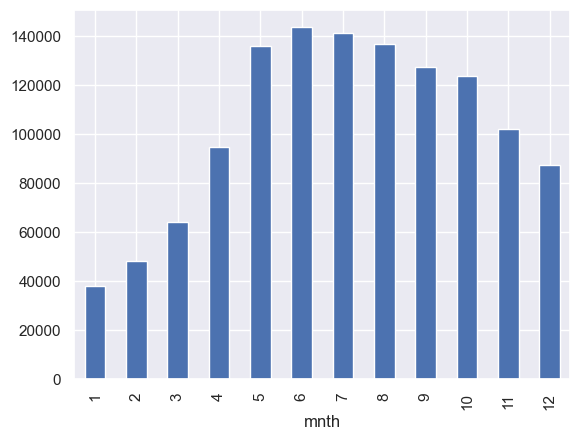

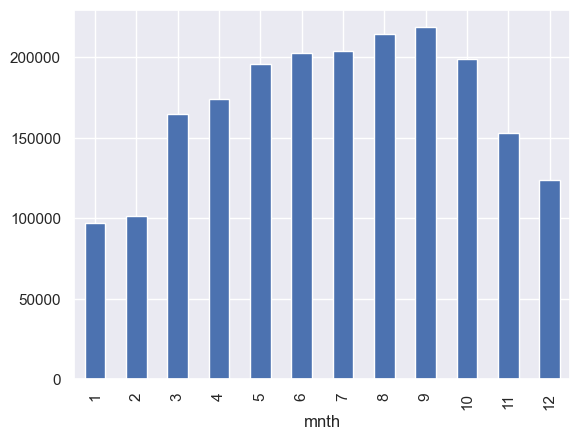

In [17]:
# checking total counts in different months across years
for i in range(2):
    rental[rental.yr == i].groupby('mnth')['cnt'].sum().plot.bar()
    plt.show()

In [18]:
#  it seems months from 5 - 10 have highest demand

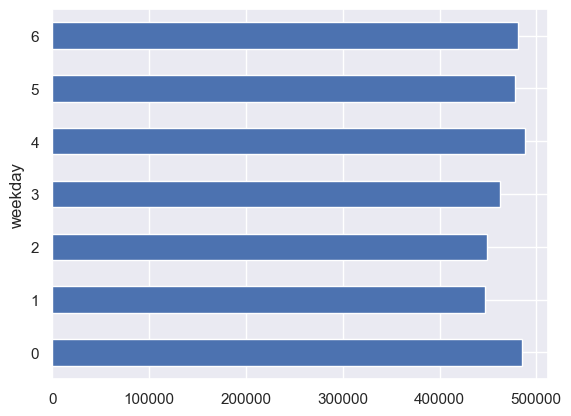

In [19]:
# checking total counts in different weekdays
rental.groupby('weekday')['cnt'].sum().plot.barh()
plt.show()

In [20]:
# weekends have more overall demand wrt eah weekday

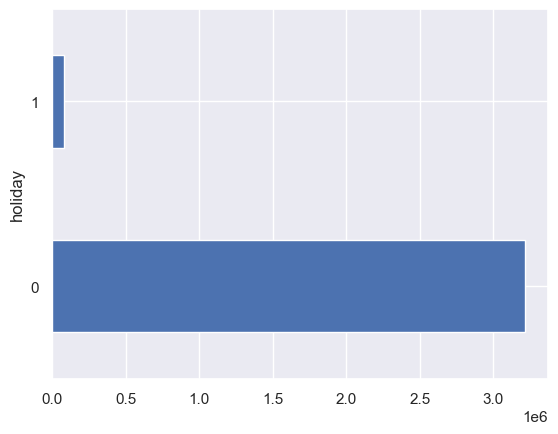

In [21]:
# checking total counts in holidays vs non holidays
rental.groupby('holiday')['cnt'].sum().plot.barh()
plt.show()

In [22]:
# Holidays have less demand as observed earlier

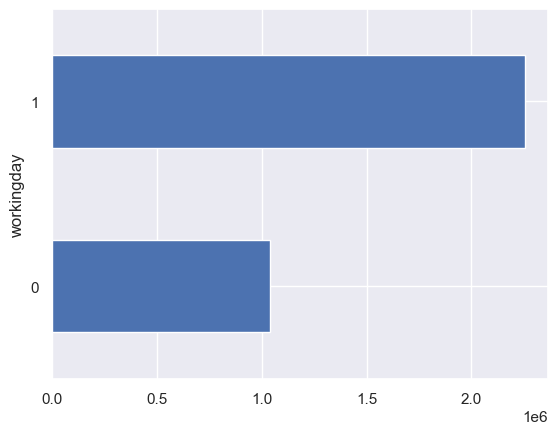

In [23]:
# checking total counts in workingdays vs non workingdays
rental.groupby('workingday')['cnt'].sum().plot.barh()
plt.show()

In [24]:
# working days have more overall demand.

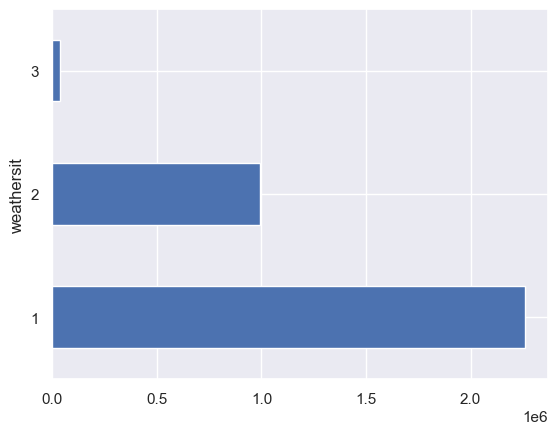

In [25]:
# checking relation with weather situation
rental.groupby('weathersit')['cnt'].sum().plot.barh()
plt.show()

In [26]:
# no surprise here , clear days have far more demand.

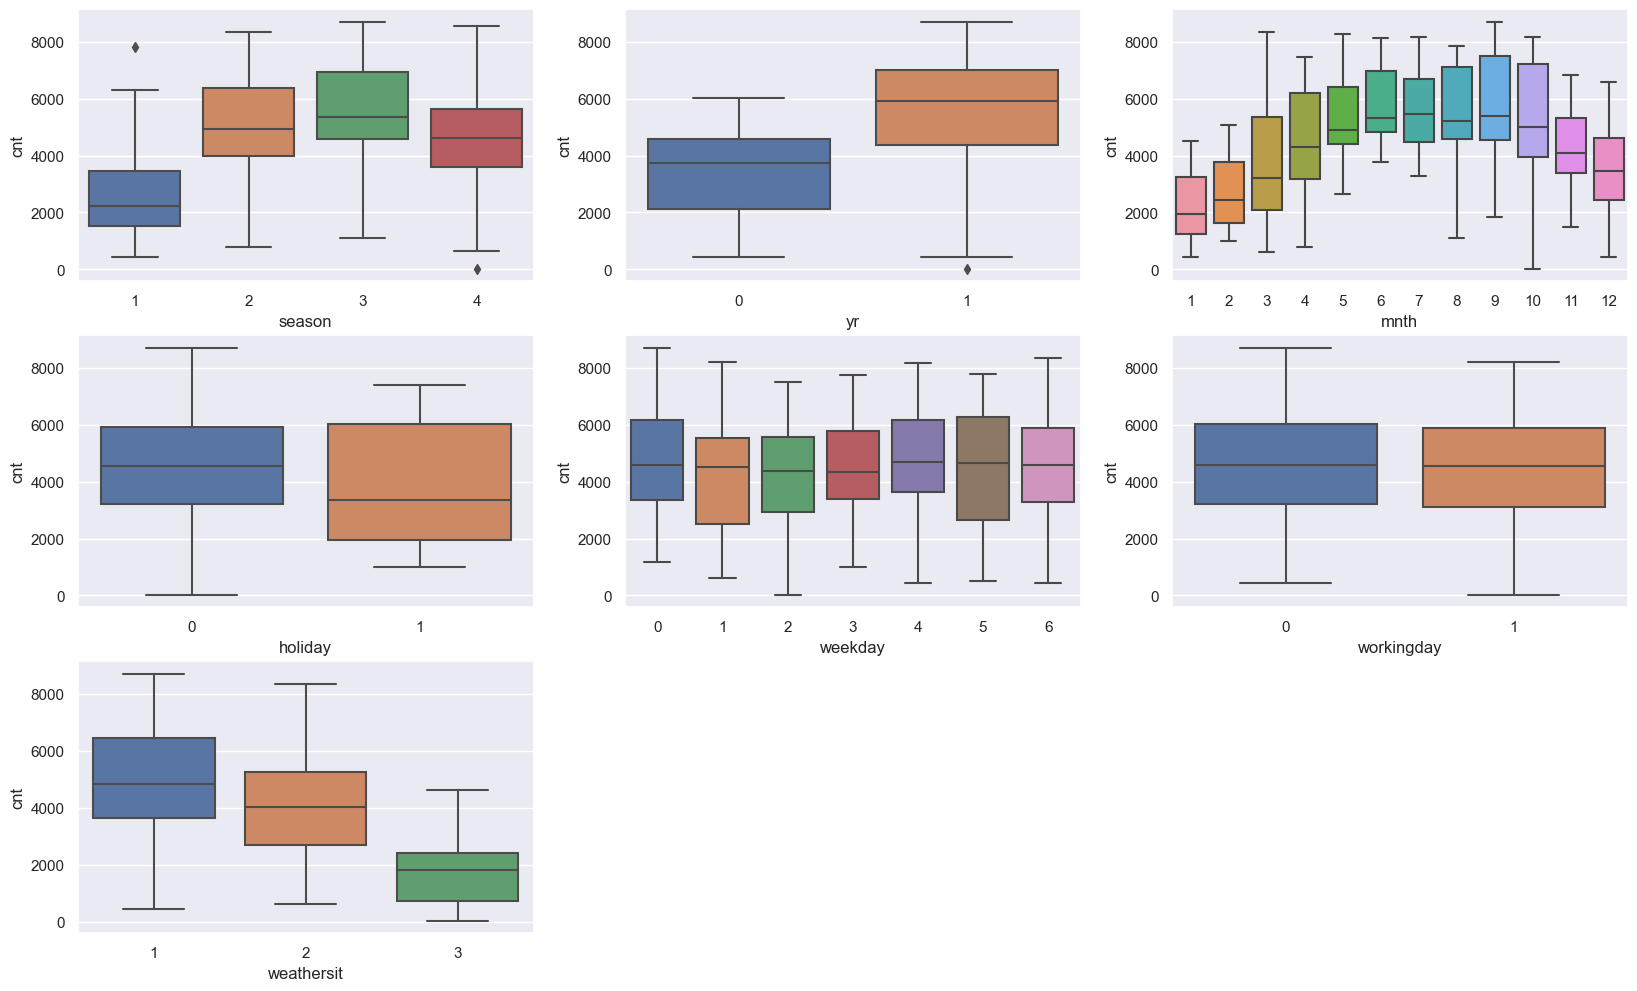

In [27]:
#Plotting box plot of categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = rental)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental)
plt.show()

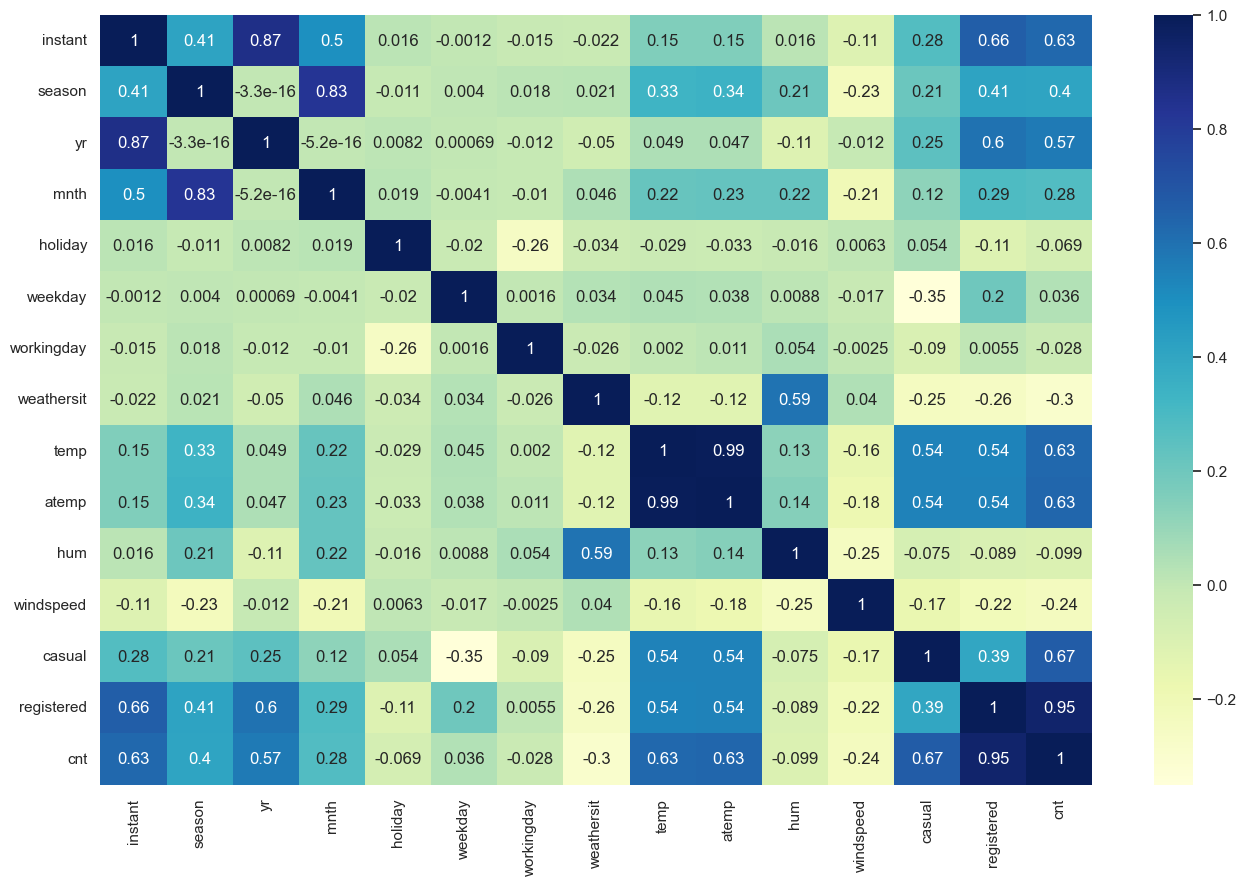

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(rental.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [29]:
# there are few useless variables which need to be dropped as those are completely unrelated for prediction of demand.

## Step 3: Data Preparation
- a lot of categorical variables have been coded , those need to be converted to meaningful string values

In [30]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [31]:
#breaking the 'season' variable into different names
rental['season'] =  rental['season'].map({1 : 'spring' , 2 : 'summer', 3 : 'fall', 4 : 'winter'})

In [32]:
rental.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,spring,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,spring,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [33]:
#breaking the 'weathersit' variable into different names
rental['weathersit'] =  rental['weathersit'].map({1 : 'weather_clear' , 2 : 'weather_mistcloudy', 3 : 'weather_lightrain'})

In [34]:
#breaking the 'mnth' variable into different names

rental['mnth'] =  rental['mnth'].map({1 : 'january' , 2 : 'february', 3 : 'march' , 4 : 'april' , 5 : 'may' , 6 : 'june' , 7 : 'july' , 8 : 'august' , 9 : 'september' , 10 : 'october' , 11 : 'november' , 12 : 'december'})

In [35]:
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,january,0,1,1,weather_mistcloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,january,0,2,1,weather_mistcloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,january,0,3,1,weather_clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,january,0,4,1,weather_clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,january,0,5,1,weather_clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.4+ KB


### Dummy Variables
#### The variable 'season' , 'mnth' , 'yr' and 'weathersit' has different levels. We need to convert these levels into meaningful numeric integer.

In [37]:
status = pd.get_dummies(rental['season'],drop_first = True)

In [38]:
rental = pd.concat([rental, status], axis = 1)

In [39]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  spring      730 non-null    uint8  
 17  summer      730 non-null    uint8  
 18  winter      730 non-null    uint8  
dtypes: float64(4), int64(8), obje

In [40]:
status = pd.get_dummies(rental['mnth'],drop_first = True)
rental = pd.concat([rental, status], axis = 1)

In [41]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  spring      730 non-null    uint8  
 17  summer      730 non-null    uint8  
 18  winter      730 non-null    uint8  
 19  august      730 non-null    u

In [42]:
status = pd.get_dummies(rental['weathersit'],drop_first = True)
rental = pd.concat([rental, status], axis = 1)

In [43]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant             730 non-null    int64  
 1   dteday              730 non-null    object 
 2   season              730 non-null    object 
 3   yr                  730 non-null    int64  
 4   mnth                730 non-null    object 
 5   holiday             730 non-null    int64  
 6   weekday             730 non-null    int64  
 7   workingday          730 non-null    int64  
 8   weathersit          730 non-null    object 
 9   temp                730 non-null    float64
 10  atemp               730 non-null    float64
 11  hum                 730 non-null    float64
 12  windspeed           730 non-null    float64
 13  casual              730 non-null    int64  
 14  registered          730 non-null    int64  
 15  cnt                 730 non-null    int64  
 16  spring  

In [44]:
varlist = ['season', 'mnth' , 'weathersit']

In [45]:
# dropping columns in varlist as they have been converted to 0s and 1s 

rental.drop(varlist, axis = 1, inplace = True)

In [46]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   instant             730 non-null    int64  
 1   dteday              730 non-null    object 
 2   yr                  730 non-null    int64  
 3   holiday             730 non-null    int64  
 4   weekday             730 non-null    int64  
 5   workingday          730 non-null    int64  
 6   temp                730 non-null    float64
 7   atemp               730 non-null    float64
 8   hum                 730 non-null    float64
 9   windspeed           730 non-null    float64
 10  casual              730 non-null    int64  
 11  registered          730 non-null    int64  
 12  cnt                 730 non-null    int64  
 13  spring              730 non-null    uint8  
 14  summer              730 non-null    uint8  
 15  winter              730 non-null    uint8  
 16  august  

In [47]:
# lets also drop some irrelevant variables such as 'instant' , 'dteday' , 'casual' , 'registered'
drop_list = ['instant' , 'dteday' , 'casual' , 'registered']
rental.drop(drop_list, axis = 1, inplace = True)

In [48]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   weekday             730 non-null    int64  
 3   workingday          730 non-null    int64  
 4   temp                730 non-null    float64
 5   atemp               730 non-null    float64
 6   hum                 730 non-null    float64
 7   windspeed           730 non-null    float64
 8   cnt                 730 non-null    int64  
 9   spring              730 non-null    uint8  
 10  summer              730 non-null    uint8  
 11  winter              730 non-null    uint8  
 12  august              730 non-null    uint8  
 13  december            730 non-null    uint8  
 14  february            730 non-null    uint8  
 15  january             730 non-null    uint8  
 16  july    

## Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
rental_train, rental_test = train_test_split(rental, train_size = 0.8, test_size = 0.2, random_state = 100)

In [50]:
rental_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 367 to 520
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  584 non-null    int64  
 1   holiday             584 non-null    int64  
 2   weekday             584 non-null    int64  
 3   workingday          584 non-null    int64  
 4   temp                584 non-null    float64
 5   atemp               584 non-null    float64
 6   hum                 584 non-null    float64
 7   windspeed           584 non-null    float64
 8   cnt                 584 non-null    int64  
 9   spring              584 non-null    uint8  
 10  summer              584 non-null    uint8  
 11  winter              584 non-null    uint8  
 12  august              584 non-null    uint8  
 13  december            584 non-null    uint8  
 14  february            584 non-null    uint8  
 15  january             584 non-null    uint8  
 16  july  

### Rescaling the Features 

- we will use MinMax scaling to scale some of the variables in the dataset, such as temp, atemp , hum, windspeed, casual , registered

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

rental_train[num_vars] = scaler.fit_transform(rental_train[num_vars])

In [54]:
rental_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,january,july,june,march,may,november,october,september,weather_lightrain,weather_mistcloudy
367,1,0,4,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,...,1,0,0,0,0,0,0,0,0,0
648,1,0,5,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,...,0,0,0,0,0,0,1,0,0,0
44,0,0,3,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,...,0,0,0,0,0,0,0,0,0,0
705,1,0,6,0,0.326094,0.318824,0.787463,0.189819,0.573631,0,...,0,0,0,0,0,0,0,0,0,1
379,1,0,2,1,0.133996,0.108365,0.431945,0.449210,0.263346,1,...,1,0,0,0,0,0,0,0,0,0


In [55]:
rental_train.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,january,july,june,march,may,november,october,september,weather_lightrain,weather_mistcloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,2.948630,0.726027,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,...,0.087329,0.075342,0.077055,0.090753,0.087329,0.080479,0.092466,0.080479,0.027397,0.342466
std,0.500241,0.163378,1.947184,0.446377,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,...,0.282558,0.264169,0.266907,0.287504,0.282558,0.272267,0.289931,0.272267,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


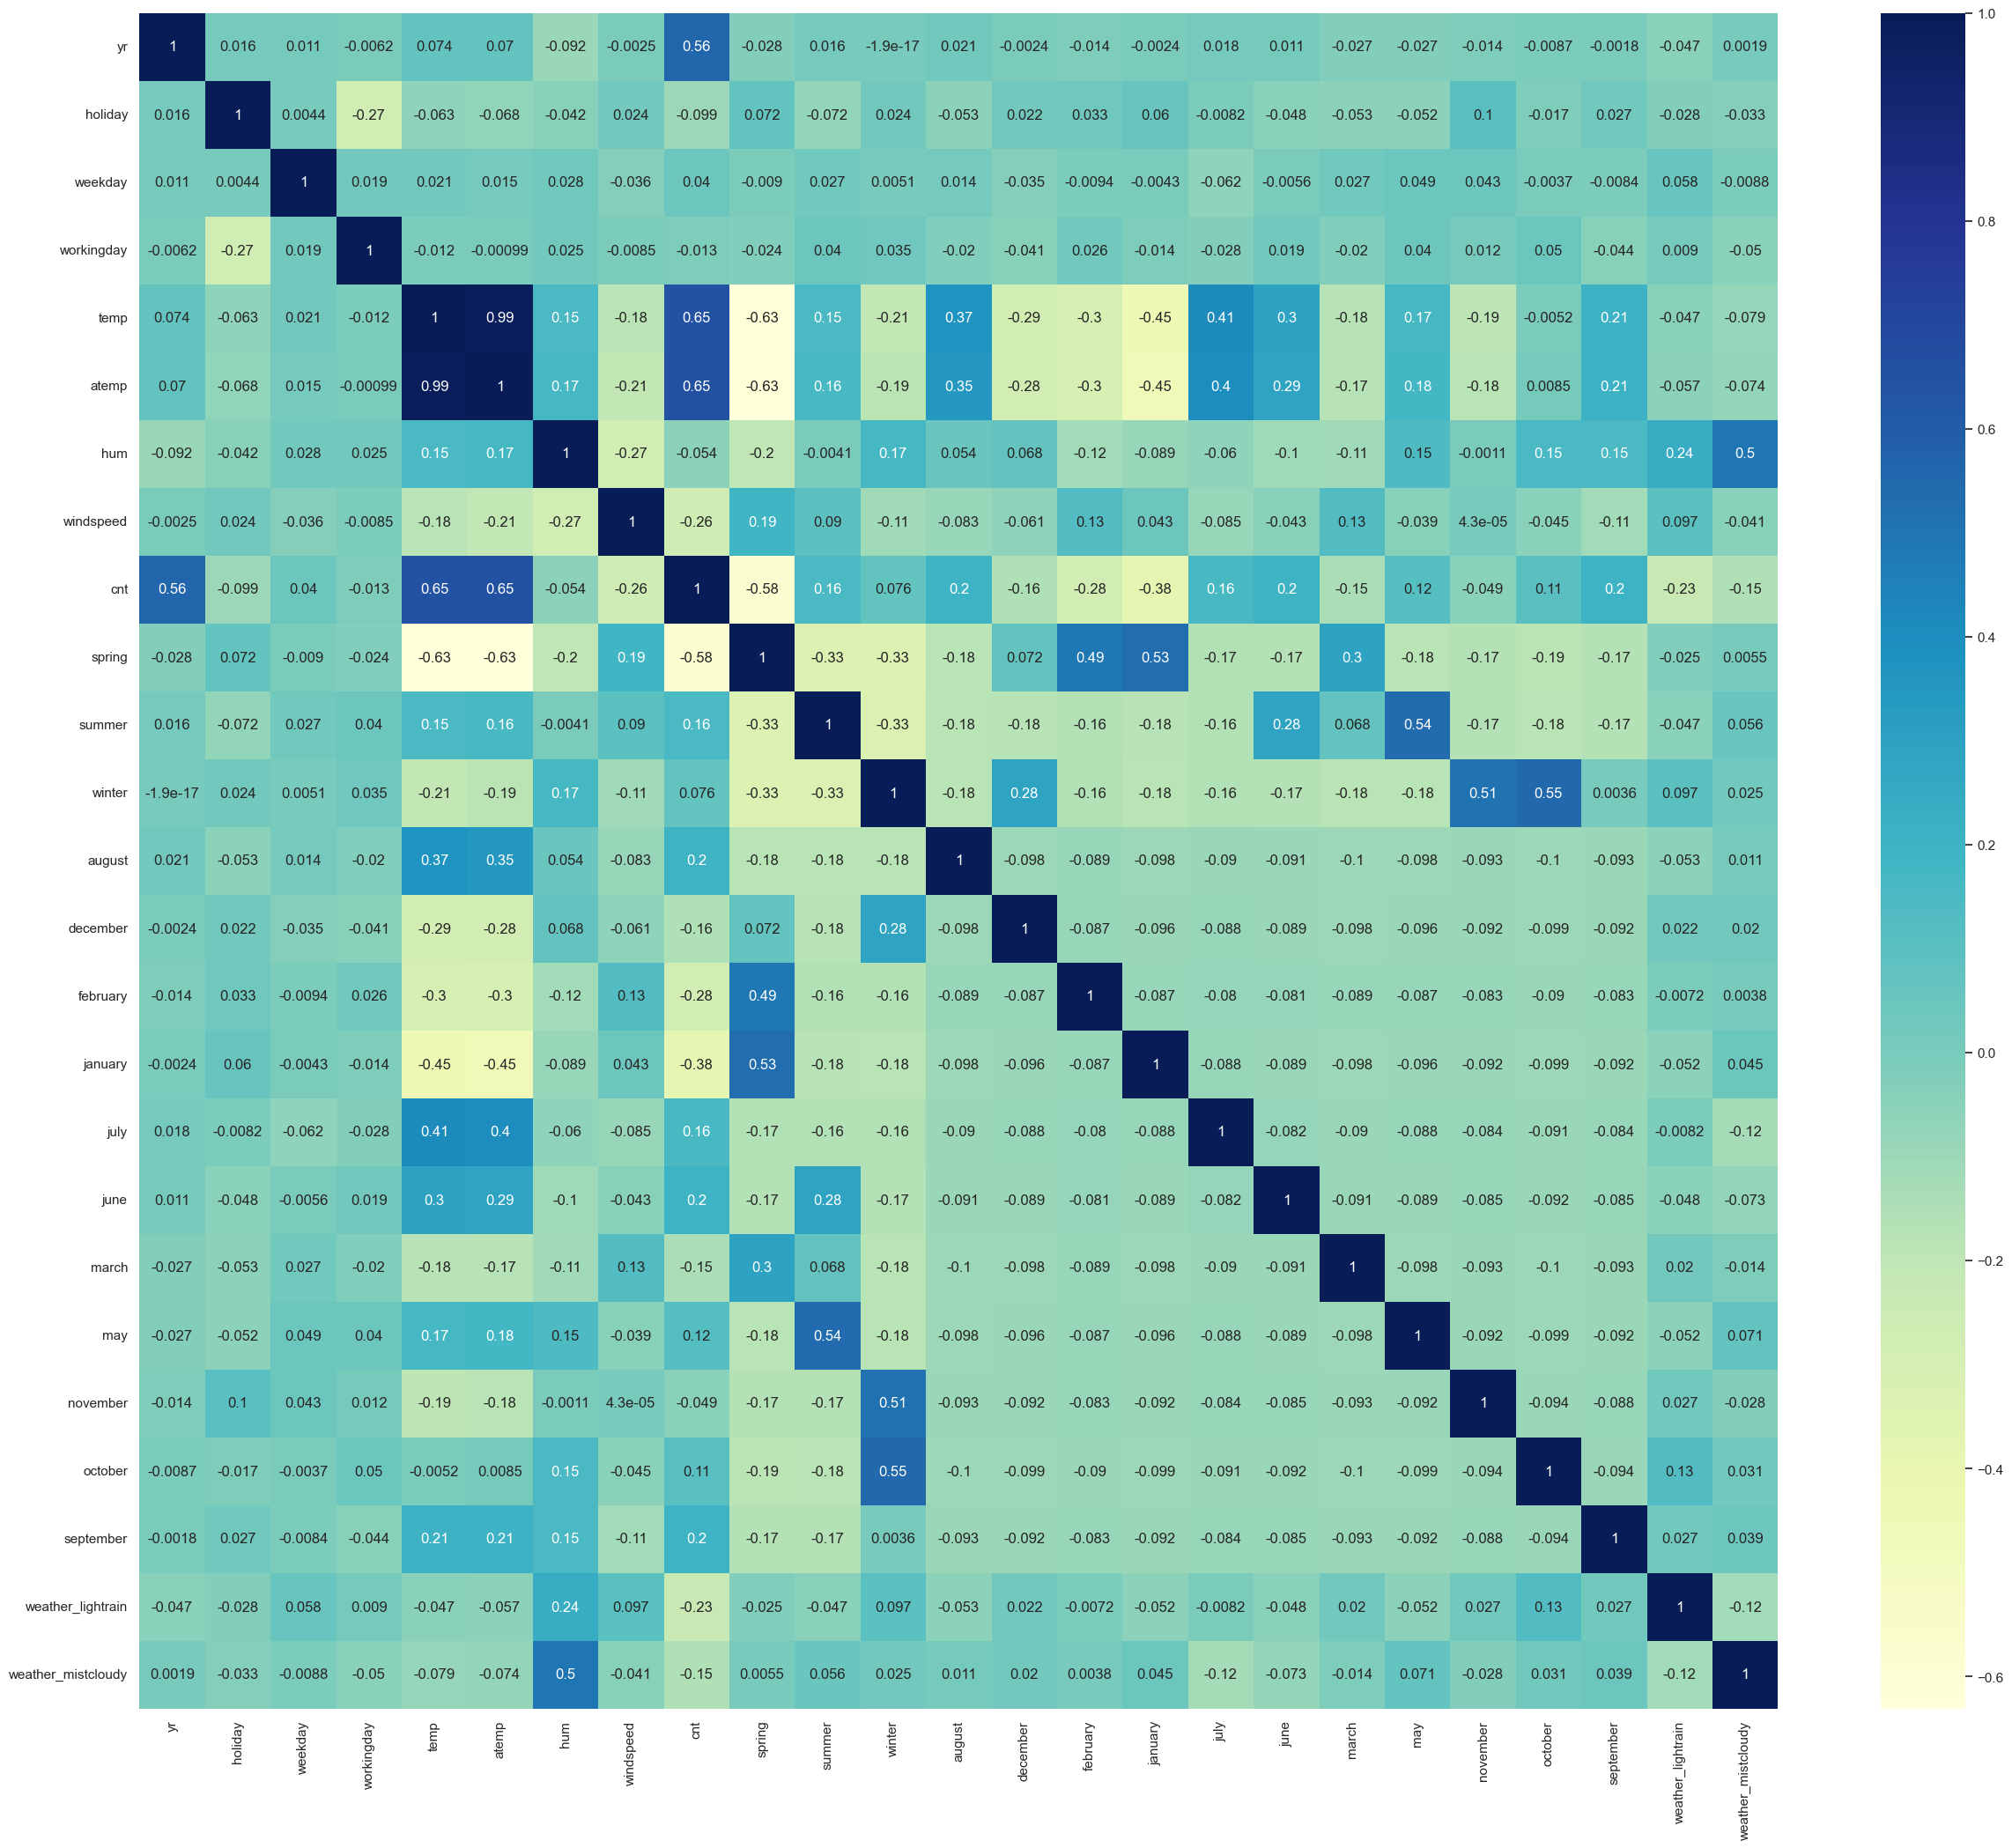

In [56]:
plt.figure(figsize = (30, 25))
sns.heatmap(rental_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [57]:
y_train = rental_train.pop('cnt')
X_train = rental_train

## Building linear regression model

### RFE

#### 1st LR model
Recursive feature elimination

In [58]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 5),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', True, 1),
 ('december', True, 1),
 ('february', True, 1),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 3),
 ('march', False, 4),
 ('may', True, 1),
 ('november', True, 1),
 ('october', False, 2),
 ('september', True, 1),
 ('weather_lightrain', True, 1),
 ('weather_mistcloudy', True, 1)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'may', 'november', 'september', 'weather_lightrain',
       'weather_mistcloudy'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['weekday', 'june', 'march', 'october'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [63]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     161.9
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          2.88e-218
Time:                        21:48:33   Log-Likelihood:                 599.73
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     563   BIC:                            -1066.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3461      0

In [67]:
# we see a few variables with statistical insignificance , lets try to remove them by reducing features of RFE

### RFE 
#### 2nd LR model
#### building 2nd model uing RFE with 15 variables 

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 10),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 6),
 ('december', True, 1),
 ('february', False, 2),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 8),
 ('march', False, 9),
 ('may', False, 5),
 ('november', True, 1),
 ('october', False, 7),
 ('september', True, 1),
 ('weather_lightrain', True, 1),
 ('weather_mistcloudy', True, 1)]

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'december', 'january', 'july', 'november', 'september',
       'weather_lightrain', 'weather_mistcloudy'],
      dtype='object')

In [71]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'august', 'february', 'june', 'march',
       'may', 'october'],
      dtype='object')

In [72]:
# building the model using statsmodel 
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [73]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [74]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          9.71e-222
Time:                        21:48:34   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3181      0

In [75]:
# thats a pretty good model using RFE with
# very good R2 score of 0.849 (.845 adj R2) which means we are able to explain around 85% of the variation.
# None of the coeeficients are statistically insignificant
# DW statistic is arounf 2 which indicates no autocorrelation
# some of the coeffcients are negative indicating inverse relation with demand.

In [76]:
# although this model seems good, lets try to make sense if we can build a story aroud this.Maybe we can remove some of the features.

## Building linear regression model manually removing variables

### we will use backward elimination approch after initial 15 variables found using RFE

In [77]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'december', 'january', 'july', 'november',
       'september', 'weather_lightrain', 'weather_mistcloudy'],
      dtype='object')

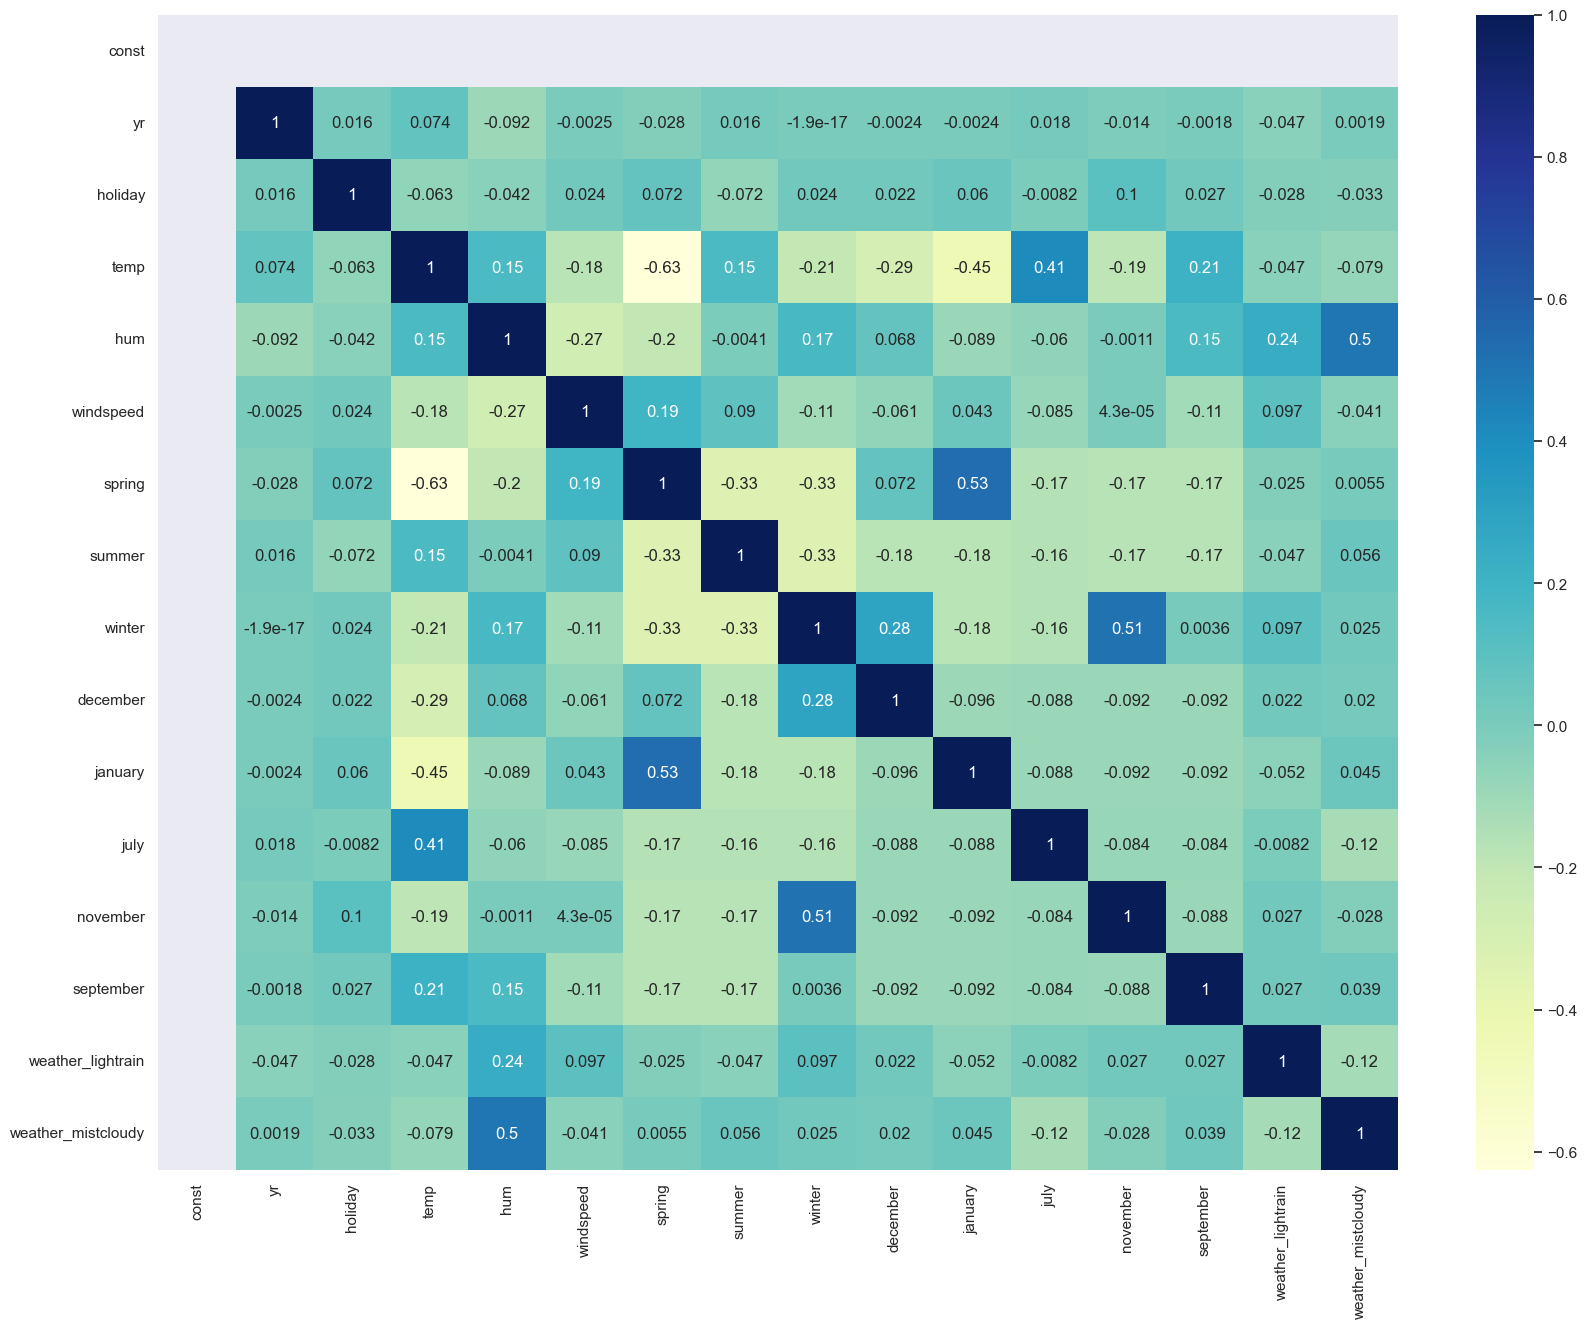

In [78]:
#lets build a heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(X_train_rfe.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [79]:
# few features are having comparatively high correlation coeffcients, such as 
# winter and january , summer and temp , summer and july , hum and wather conditions
# as we have chosen seasons and months as well in the model, it might result in multicollinearity
# lets check the VIFs for these features and remove some of them to check the effects

### Checking VIF to address multicollinearity

In [80]:
X_train_lm = X_train_rfe

In [81]:
X_VIF = X_train_lm.drop('const' , 1)

In [82]:
# checking VIFs for 15 features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.19
2,temp,18.15
4,windspeed,4.70
5,spring,4.43
7,winter,3.80
6,summer,2.81
14,weather_mistcloudy,2.34
0,yr,2.11
11,november,1.74
9,january,1.71


In [83]:
# all the feature VIFs (except 'hum' and 'temp') seem to be under 5 (we will consider VIF  = 5 in  this case study as the critical number) . 

In [84]:
# lets remove 'hum' first as 'temp' has higher correlation with target variable.

#### 3rd LR model

In [85]:
X_train_lm = X_train_lm.drop('hum' , 1)

In [86]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)


# Create a  fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [87]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          8.39e-219
Time:                        21:48:37   Log-Likelihood:                 584.55
No. Observations:                 584   AIC:                            -1139.
Df Residuals:                     569   BIC:                            -1074.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2425      0

In [88]:
# all the features are staistically significant, with very good adj. R2 score

In [89]:
# checking VIF summary again
X_VIF = X_train_lm.drop('const' , 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.34
3,windspeed,4.65
4,spring,2.87
6,winter,2.78
5,summer,2.28
0,yr,2.08
10,november,1.69
8,january,1.62
9,july,1.61
13,weather_mistcloudy,1.56


In [90]:
#all the VIFs have already come under 5(excpe 'temp') , which is pretty good.
#lets check if we can drop months as it seems the seasonality variation can be expalined by seasons themselves.

#### 4th LR model

In [91]:
X_train_lm = X_train_lm.drop('july' , 1)

In [92]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)


# Create a  fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [93]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          3.08e-218
Time:                        21:48:37   Log-Likelihood:                 580.38
No. Observations:                 584   AIC:                            -1133.
Df Residuals:                     570   BIC:                            -1072.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2352      0

In [94]:
# checking VIF summary again
X_VIF = X_train_lm.drop('const' , 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.65
2,temp,3.96
4,spring,2.74
6,winter,2.58
0,yr,2.08
5,summer,1.92
9,november,1.69
8,january,1.61
12,weather_mistcloudy,1.55
7,december,1.42


In [95]:
# as can be seen, VIFs for almost all features even come down below 2 and R2 score has dropped only marginally
# also, AIC has improved marginally , lets see if we continue removing month features without compromising much of R2

#### 5th LR model

In [96]:
X_train_lm = X_train_lm.drop('november' , 1)

In [97]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a  fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     247.9
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          2.50e-217
Time:                        21:48:38   Log-Likelihood:                 575.37
No. Observations:                 584   AIC:                            -1125.
Df Residuals:                     571   BIC:                            -1068.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2092      0

In [98]:
# checking VIF summary again
X_VIF = X_train_lm.drop('const' , 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.93
4,spring,2.74
0,yr,2.08
5,summer,1.92
6,winter,1.84
8,january,1.60
11,weather_mistcloudy,1.55
7,december,1.28
9,september,1.23


In [99]:
# as can be seen, R2 score has not dropped much , so we will continue removing month features to minimize total no of predictors.

#### 6th LR model

In [100]:
X_train_lm = X_train_lm.drop('december' , 1)

In [101]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a  fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          2.36e-217
Time:                        21:48:38   Log-Likelihood:                 572.54
No. Observations:                 584   AIC:                            -1121.
Df Residuals:                     572   BIC:                            -1069.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1922      0

In [102]:
# checking VIF summary again
X_VIF = X_train_lm.drop('const' , 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.93
4,spring,2.59
0,yr,2.08
5,summer,1.92
6,winter,1.63
7,january,1.55
10,weather_mistcloudy,1.55
8,september,1.23
9,weather_lightrain,1.07


In [103]:
# we will remove january next.

#### 7th LR model

In [104]:
X_train_lm = X_train_lm.drop('january' , 1)

In [105]:
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a  fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.7
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          9.54e-218
Time:                        21:48:39   Log-Likelihood:                 570.53
No. Observations:                 584   AIC:                            -1119.
Df Residuals:                     573   BIC:                            -1071.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1788      0

In [106]:
# checking VIF summary again
X_VIF = X_train_lm.drop('const' , 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.90
0,yr,2.07
4,spring,2.05
5,summer,1.92
6,winter,1.63
9,weather_mistcloudy,1.55
7,september,1.23
8,weather_lightrain,1.07
1,holiday,1.04


In [107]:
# our model keeps getting better with less features, we still have very good R2  score and all of the features are significant.
# AIC has also seem to be improving although marginally.

#### 8th LR model

In [108]:
# lets remove 'september' as well.

In [109]:
X_train_lm = X_train_lm.drop('september' , 1)

In [110]:
X_train_lm = sm.add_constant(X_train_lm)

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     305.5
Date:                Sun, 09 Jul 2023   Prob (F-statistic):          2.32e-212
Time:                        21:48:41   Log-Likelihood:                 554.91
No. Observations:                 584   AIC:                            -1090.
Df Residuals:                     574   BIC:                            -1046.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2050      0

In [111]:
# checking VIF summary again
X_VIF = X_train_lm.drop('const' , 1)
vif = pd.DataFrame()
vif['Features'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.61
0,yr,2.07
4,spring,2.01
5,summer,1.81
6,winter,1.61
8,weather_mistcloudy,1.53
7,weather_lightrain,1.07
1,holiday,1.04


In [112]:
# in our 8th model, lets examine the coefficients as other statistics are very good.
# temp seems to have positive relation with overll demand, which is reflected in 'summer' variable as well. 
# In winter also, the demand increase, while in spring demand decreases, which is consistent what we have found in EDA
# with incraese windspeed demand decreases as expected.
# as yearwise we have upward trend, the 'yr' variable also contributes heavily towards variation explainability of our model.
# the other observations are also inline with what we observed in data visualisation part.

### OBSERVATIONS & SUGGESTIONS

In [113]:
#1 taking note of the seasonality, it can be suggested that the company should make bikes available in summer as well as in winter,
# in spring session though, the comapny can invest the resouces elsewhere, as demand is comaparatively lower .
# the lesser demand in spring can be due to chilling weather outside , because spring consists of december, january and february as per dataset
# which are the coldest months in US.

In [114]:
#2 Also during bright, sunny days the demand soars as comapred to rainy/cloudy/snowy days,  so those days specifically the comapny must ensure to have enough bikes at proper location to cater to this demand.
# the comapny can consider checking weather forecast regularly to estimate the demand variation.

In [115]:
#3 It also seems, holidays have less demand as compared to working days so resouce allocation can be planned accordingly.

## Residual Analysis of the train data

In [116]:
y_train_count = lr.predict(X_train_lm)

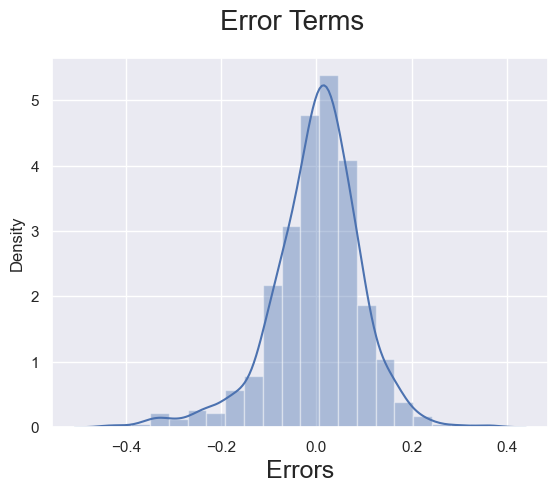

In [117]:
# Plot the histogram of the error terms
sns.distplot((y_train - y_train_count), bins = 20)
plt.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [118]:
# normality is evident in the error terms which is compliant with our LR assumptions.

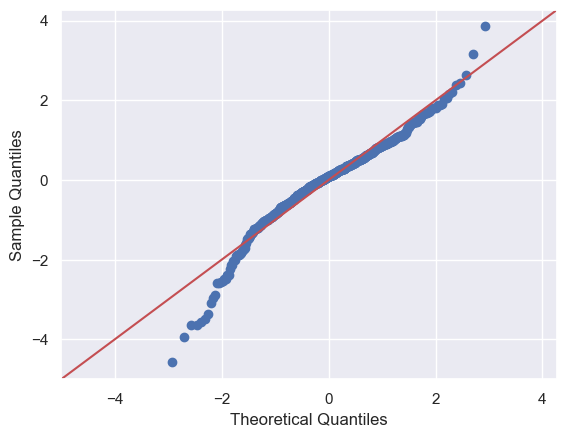

In [121]:
# checking with QQ plot
import scipy.stats as stats
sm.qqplot(res,line='45',fit=True,dist=stats.norm)
plt.show()

In [ ]:
# We can see that since we are plotting the data with the theoretical quantiles of a normal distribution,
# we are getting almost a straight line.

<AxesSubplot:>

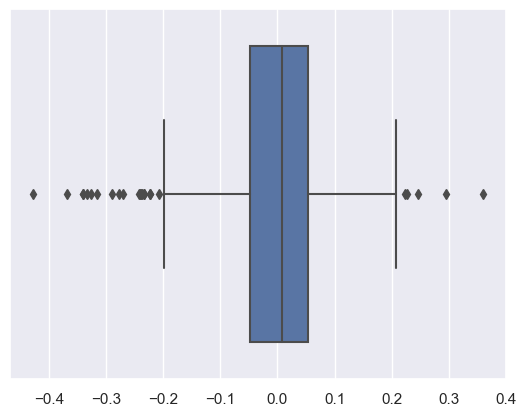

In [140]:
sns.boxplot(res)

In [143]:
from scipy import stats
anderson_results = stats.anderson(res, dist='norm')
anderson_results

AndersonResult(statistic=5.7195555204312996, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

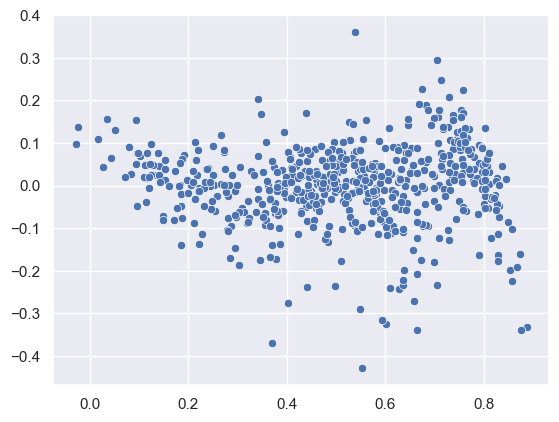

In [122]:
# checking Heteroskedasticity
res = y_train - y_train_count
sns.scatterplot(x = y_train_count , y = res )
plt.show()

In [123]:
# there seem to be no Heteroskedasticity effect in residuals , as it does not evidently show any funnel type pattern, 
# most of the datapoints are grouped in the middle, some are scattered at the top and bottom

## Making Predictions Using the Final (8th) Model

In [124]:
#### Applying the scaling on the test sets

In [125]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

rental_test[num_vars] = scaler.transform(rental_test[num_vars])

In [126]:
rental_test.describe()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,january,july,june,march,may,november,october,september,weather_lightrain,weather_mistcloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,3.184932,0.547945,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,...,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041,0.034247,0.315068
std,0.498699,0.182488,2.197188,0.499409,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,...,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,6.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [127]:
y_test = rental_test.pop('cnt')
X_test = rental_test

In [128]:
X_test.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'august', 'december',
       'february', 'january', 'july', 'june', 'march', 'may', 'november',
       'october', 'september', 'weather_lightrain', 'weather_mistcloudy'],
      dtype='object')

In [129]:
# dropping variables from X_test
drop_list_from_test = ['weekday', 'workingday' , 'atemp' , 'hum', 'august' , 'december' , 'february' , 'january' , 'july' ,'june', 'march', 'may', 'november',
       'october', 'september']  
X_test = X_test.drop(drop_list_from_test, axis = 1)

In [130]:
X_test.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'weather_lightrain', 'weather_mistcloudy'],
      dtype='object')

In [131]:
X_test_lr8 = sm.add_constant(X_test)

In [132]:
X_test_lr8.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'weather_lightrain', 'weather_mistcloudy'],
      dtype='object')

In [133]:
# Making predictions using the 8th model

y_pred_lr8 = lr.predict(X_test_lr8)

##  Model Evaluation

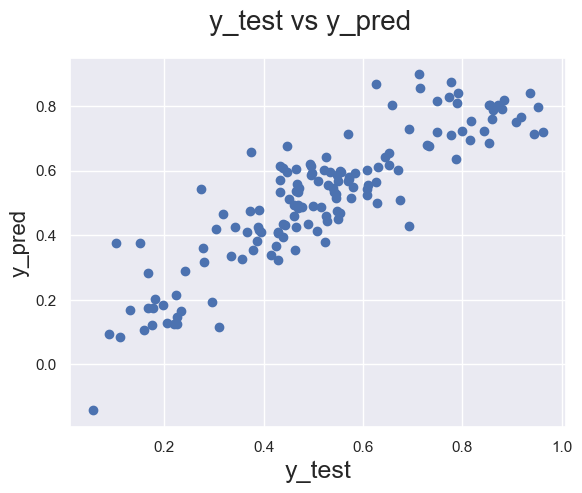

In [134]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred_lr8)
plt.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

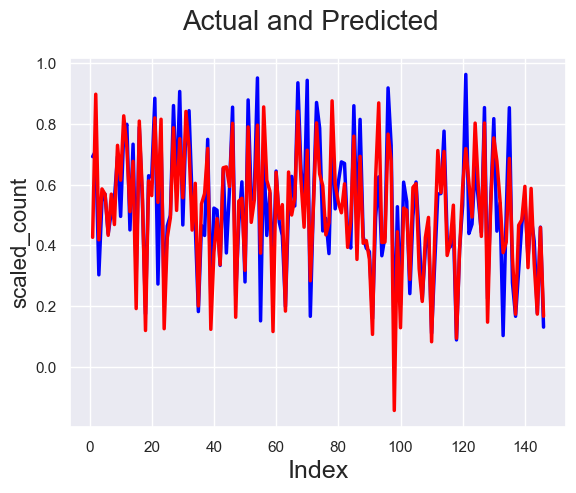

In [135]:
c = [i for i in range(1,147,1)]
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_lr8, color="red",  linewidth=2.5, linestyle="-")
plt.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('scaled_count', fontsize=16)
plt.show()

In [136]:
# Train data R2 score
from sklearn.metrics import r2_score
r_squared_train= r2_score(y_train, y_train_count)
print(r_squared_train) 

0.8272999660911962


In [137]:
# Test data R2 score
from sklearn.metrics import r2_score
r_squared_test = r2_score(y_test, y_pred_lr8)
print( r_squared_test) 

0.7635937737870884


In [138]:
Diff =(r_squared_train - r_squared_test) * 100
print(Diff)

6.370619230410779


### Evaluation comments

In [139]:
# generally it is considered very good model if the R2 score of test data remains within +- 5% of R2 score of train data.
#As can be seen we are within +- 7% range and our trained model can explain more than 75% of variation in test data, which seems satisfactory.


In [ ]:
reelct = {
    'Alipurduar': 
}